In [1]:
%%bash
mkdir tor_data
cd tor_data
wget -q -nc https://www.spc.noaa.gov/wcm/data/1950-2024_actual_tornadoes.csv > /dev/null

mkdir: cannot create directory ‘tor_data’: File exists


# L5 - Scikit-Learn - Preprocessing

---

10 total points

Due: February 15th, 2026 at 11:59 p.m.

---

Directions:

1. Please rename the file by clicking on "LX-First-Last.ipynb" where X is the lab number, and replace First and Last with your first and last name.
2. Click File -> Save to make sure your most recent edits are saved.
3. In the upper right hand corner of the screen, click on "Share". Click on "Restricted" and change it to "Anyone with the link".
4. Copy the link and submit it on Blackboard. Make sure you follow these steps completely, or I will be unable to grade your work.

---

### Overview

This lab will help you understand scikit-learn and its preprocessing capabilities. We will walk through some examples of how scikit-learn can help solve Geoscience problems. Periodically, I will 1) ask you to either repeat the demonstrated code in a slightly different way; or 2) ask you to combine two or more techniques to solve a problem.

You can use generative AI to *help* answer these problems. The answer should still be in *your own words*. Think of the generative AI descriptions as those from a book. You still have to cite your source and you cannot plagiarize directly from the source. *For every question that you used generative AI for help*, please reference the generative AI you used and what your prompt or prompts were.

However, it is crucial that you understand the code well enough to effectively use generative AI tools that are likely to be widely available and recommended for use at many organizations. Although they are improving at an incredible rate, they still produce bugs, especially with domain-specific and complex problems. Make sure that you verify the answers before putting them in your own words.



### Problem 1

You need to make a conclusion about how annual tornado counts are changing over time. Below is the raw result from the 1950 - 2024 data.

The following code reads in the csv file and extracts a `datetime`, and uses that new column as an index for a resample. The resample counts how many rows are in each year and plots the result.


<Axes: xlabel='datetime'>

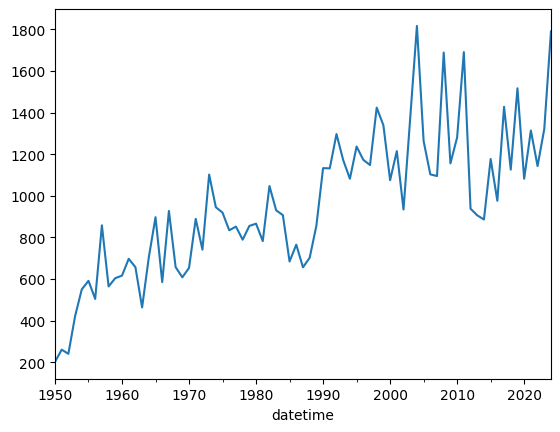

In [2]:
import pandas as pd

tor = pd.read_csv("tor_data/1950-2024_actual_tornadoes.csv")
tor['datetime'] = tor['date'] + " " + tor['time']
tor['datetime'] = pd.to_datetime(tor['datetime'])
tor = tor.set_index('datetime')

tor_count = tor.resample('YS').size()
tor_count.name = 'count'

tor_count.plot()

Modify the following code so that removes rows with a `mag` less than 1. If there is an observational bias that causes weak tornadoes to be detected more often from the 1990s and on, what does the plot below tell you? Answer in this markdown after modifying the code:

<Axes: xlabel='datetime'>

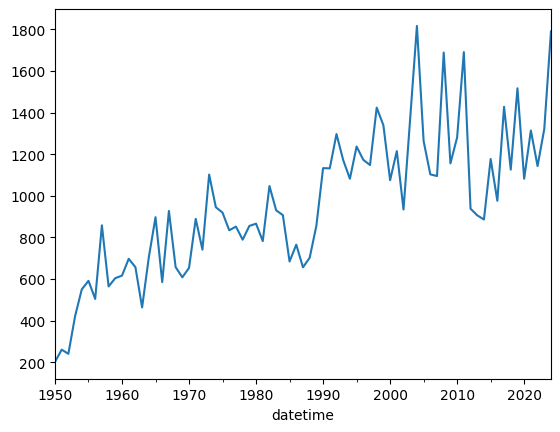

In [3]:
ef1_plus = tor.copy()

ef1_plus_count = ef1_plus.resample('YS').size()
ef1_plus_count.name = 'count'

ef1_plus_count.plot()


### Problem 2

**Use `ef1_plus_count_values` (only `mag` of 1 or greater)**

You are tasked with identifying "unusual" years in the tornado record by *normalizing* the annual counts. This provides context to each count based on the observational record.

**sklearn's preprocessing subpackage**

You can normalize the data using the `preprocessing` subpackage of `sklearn`.

The following code transforms the annual count data using a `MinMaxScaler`.

Based on the original counts and the result from the scaler, what does the following code do (in your own words)? Place your answer in the markdown:


In [4]:
from sklearn import preprocessing

counts1d = ef1_plus_count.values

# this reshapes the 1D data into a 2D shape required by sklearn
counts2d = counts1d.reshape(-1, 1)

scaler = preprocessing.MinMaxScaler().fit_transform(counts2d)

# get it back to 1D
minmax_counts = scaler.flatten()

print(counts1d)
print(minmax_counts)

[ 201  260  240  421  550  591  504  858  564  604  616  697  657  463
  704  897  585  927  657  608  653  889  741 1102  945  919  834  852
  789  855  866  782 1047  930  907  684  765  656  702  856 1133 1132
 1297 1172 1082 1237 1173 1148 1424 1339 1075 1215  934 1374 1817 1263
 1103 1095 1689 1156 1281 1691  938  906  886 1177  976 1428 1126 1517
 1082 1314 1143 1321 1791]
[0.         0.0365099  0.02413366 0.13613861 0.21596535 0.24133663
 0.1875     0.40655941 0.22462871 0.24938119 0.25680693 0.30693069
 0.28217822 0.16212871 0.31126238 0.43069307 0.23762376 0.44925743
 0.28217822 0.25185644 0.27970297 0.42574257 0.33415842 0.5575495
 0.46039604 0.44430693 0.39170792 0.40284653 0.36386139 0.40470297
 0.4115099  0.3595297  0.52351485 0.45111386 0.43688119 0.29888614
 0.3490099  0.28155941 0.31002475 0.40532178 0.57673267 0.57611386
 0.67821782 0.60086634 0.54517327 0.64108911 0.60148515 0.58601485
 0.75680693 0.70420792 0.54084158 0.62747525 0.45358911 0.72586634
 1.         0.65

### Problem 3

**Use `ef1_plus_count_values` (only `mag` of 1 or greater)**

The following code transforms the annual count data using a `StandardScaler`.

Based on the original counts and the result from the scaler, what does the following code do (in your own words)? How does this differ from problem 2? Place your answer in the markdown:

In [5]:
counts1d = ef1_plus_count.values

# this reshapes the 1D data into a 2D shape required by sklearn
counts2d = counts1d.reshape(-1, 1)

scaler = preprocessing.StandardScaler().fit_transform(counts2d)

# get it back to 1D
std_counts = scaler.flatten()

print(counts1d)
print(std_counts)

[ 201  260  240  421  550  591  504  858  564  604  616  697  657  463
  704  897  585  927  657  608  653  889  741 1102  945  919  834  852
  789  855  866  782 1047  930  907  684  765  656  702  856 1133 1132
 1297 1172 1082 1237 1173 1148 1424 1339 1075 1215  934 1374 1817 1263
 1103 1095 1689 1156 1281 1691  938  906  886 1177  976 1428 1126 1517
 1082 1314 1143 1321 1791]
[-2.19777476 -2.02637017 -2.08447342 -1.55863902 -1.18387306 -1.0647614
 -1.31751054 -0.28908303 -1.14320079 -1.02699429 -0.99213234 -0.75681418
 -0.87302068 -1.4366222  -0.73647805 -0.1757817  -1.08219238 -0.08862682
 -0.87302068 -1.01537364 -0.88464133 -0.199023   -0.62898704  0.41977661
 -0.0363339  -0.11186812 -0.35880693 -0.30651401 -0.48953924 -0.29779852
 -0.26584173 -0.50987538  0.25999267 -0.07991133 -0.14673007 -0.7945813
 -0.55926314 -0.87592584 -0.74228837 -0.29489336  0.50983664  0.50693148
  0.98628328  0.62313798  0.36167336  0.81197354  0.62604314  0.55341408
  1.35523891  1.1083001   0.34133722

### Problem 4

**Use `ef1_plus_count_values` (only `mag` of 1 or greater)**

Using the `StandardScaler` output and your interpretation above, how would you communicate the following graphic to a stakeholder interested in "unusual" years. What are the top 5 years you would have them examine? Put your answer in the markdown:

Text(0.5, 0, 'year')

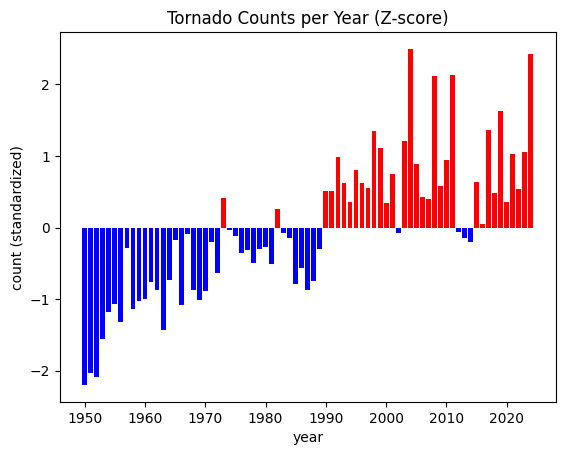

In [6]:
import matplotlib.pyplot as plt

posneg = ['red' if x >= 0 else 'blue' for x in std_counts]

plt.bar(list(range(1950, 2025)), std_counts, color=posneg)

plt.title("Tornado Counts per Year (Z-score)")

plt.ylabel("count (standardized)")
plt.xlabel("year")

### Problem 5

**Use `ef1_plus_count_values` (only `mag` of 1 or greater)**

The stakeholder has requested that you place each year into one of 3 bins:

1. less than -1
2. -1 to 1
3. greater than 1

You can perform this transformation on the standardized data using a custom function. In this case, we are going to wrap the `np.digitize` in a function and use `FunctionTransformer` to transform the data into categories.

However, once you show the plot to them, the stakeholder changes their mind and asks you to modify the code to turn it into 6 categories.

1. less than -2  (color = 'darkblue')
2. between -1 and -2 (color = 'steelblue')
3. between -1 and 0 (color = 'lightblue')
4. between 0 and 1 (color = 'lightcoral')
5. between 1 and 2 (color = 'tomato')
6. greater than 2 (color = 'darkred')

Update the plot to add more horizontal lines for the new categorical thresholds. Use the colors above to color-code the bars. Use `plt.text` or `plt.annotate` to display the text over the bars that represent the most extreme years. *Do not change the function, just the parameters you pass in to the function*

Interpet the categorized results. What years stand out to you and what years should you suggest that the stakeholder examine? Place your answer in the markdown here:

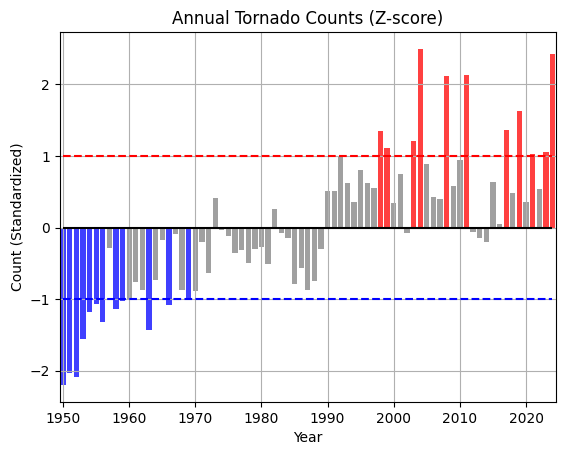

In [9]:
import numpy as np

def std_cat(std, bins):
    '''Takes a list of standardized numbers and categorizes the numbers based on
    the bins argument. The bin values must be increasing from left to
    right, and the first and last numbers define the upper edge of the
    first category (0; not inclusive) and the bottom edge of the last
    category ([len(bins) + 1]; inclusive)

    It then returns the transformed values as categories.

    E.g., [-5, 0, 5] with bins [-1, 1]
          returns [0, 1, 2]
    E.g., [-5.2, -1.1, 0.5, 1.1, 5.4] with bins [-2, -1, 1, 2]
          returns [0, 1, 2, 3, 4]
    '''

    return np.digitize(std, bins=bins)

# your function parameter `bin`
function_params = {'bins': [-1, 1]}

trans_cat = preprocessing.FunctionTransformer(std_cat,
                                              kw_args=function_params)
std_cat = trans_cat.transform(std_counts)

# your color -> category dictionary
color_lookup = {0: 'blue', 1: 'grey', 2: 'red'}

posneg = [color_lookup[val] for val in std_cat]

plt.bar(list(range(1950, 2025)), std_counts, color=posneg, alpha=0.75)

plt.title("Annual Tornado Counts (Z-score)")

# defines your category threshold lines
plt.hlines(1, 1950, 2024, color='r', ls='--')
plt.hlines(-1, 1950, 2024, color='b', ls='--')
plt.hlines(0, 1950, 2024, color='k', ls='-')

plt.ylabel("Count (Standardized)")
plt.xlabel("Year")

plt.xlim(1949.5, 2024.5)
plt.grid()

### Problem 6

I provided a generative AI the following prompt:

```
Generate code that finds the categorical z-score for the tornado fatality column per year and plots it using a color-coded bar graph. Use sklearn preprocessing for the data transformation. Use the following colors for each category:

less than -2 (color = 'darkblue')
between -1 and -2 (color = 'steelblue')
between -1 and 0 (color = 'lightblue')
between 0 and 1 (color = 'lightcoral')
between 1 and 2 (color = 'tomato')
greater than 2 (color = 'darkred')

```

#### Problem 6.1

Add and/or modify code below that aligns with the generated code.

#### Problem 6.2

In what ways would you test the output to make sure it is producing the correct results? Did you find any issues or assumptions that are not in line with Geoscience practices? Place your answer in the markdown here:


#### Problem 6.3

For a stakeholder interested in years with unusually high tornado deaths, what years do you suggest that they examine? Place your answer in the markdown here:


Mean Fatalities (μ): 72.24
Std Dev (σ):         101.59

 Year  Fatalities   Z_Score Category
 2000          41 -0.307505  -1 to 0
 2001          40 -0.317348  -1 to 0
 2002          55 -0.169699  -1 to 0
 2003          54 -0.179542  -1 to 0
 2004          36 -0.356722  -1 to 0
 2005          38 -0.337035  -1 to 0
 2006          67 -0.051579  -1 to 0
 2007          81  0.086227   0 to 1
 2008         126  0.529176   0 to 1
 2009          21 -0.504371  -1 to 0
 2010          45 -0.268132  -1 to 0
 2011         553  4.732270      > 2
 2012          70 -0.022049  -1 to 0
 2013          55 -0.169699  -1 to 0
 2014          47 -0.248445  -1 to 0
 2015          36 -0.356722  -1 to 0
 2016          17 -0.543744  -1 to 0
 2017          35 -0.366565  -1 to 0
 2018          10 -0.612648  -1 to 0
 2019          42 -0.297662  -1 to 0
 2020          76  0.037011   0 to 1
 2021         103  0.302780   0 to 1
 2022          24 -0.474841  -1 to 0
 2023          84  0.115757   0 to 1
 2024          50 -

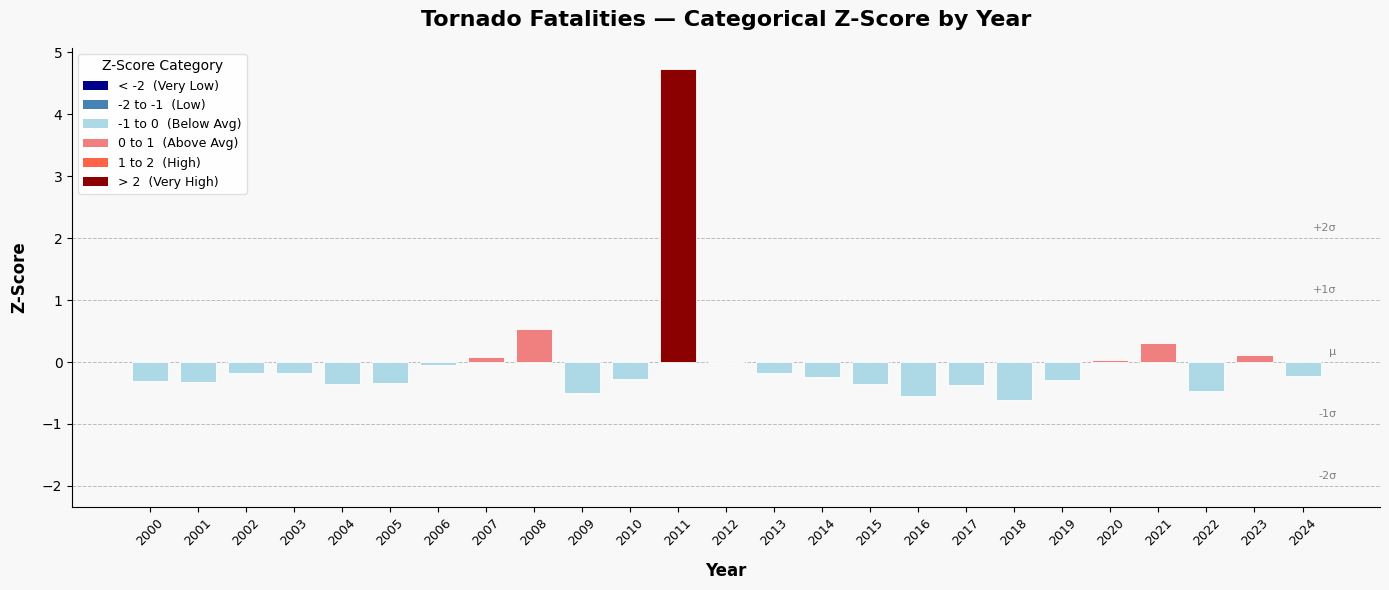

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ── Sample tornado fatality data (replace with your own dataset) ──────────
data = {
    'Year': list(range(2000, 2025)),
    'Fatalities': [
        41, 40, 55, 54, 36, 38, 67, 81, 126, 21,
        45, 553, 70, 55, 47, 36, 17, 35, 10, 42,
        76, 103, 24, 84, 50
    ]
}
df = pd.DataFrame(data)

# ── Compute z-scores using sklearn StandardScaler ─────────────────────────
scaler = StandardScaler()
df['Z_Score'] = scaler.fit_transform(df[['Fatalities']]).flatten()

# ── Assign categories and colors based on z-score ranges ──────────────────
def assign_category(z):
    if z < -2:
        return '< -2', 'darkblue'
    elif z < -1:
        return '-2 to -1', 'steelblue'
    elif z < 0:
        return '-1 to 0', 'lightblue'
    elif z < 1:
        return '0 to 1', 'lightcoral'
    elif z < 2:
        return '1 to 2', 'tomato'
    else:
        return '> 2', 'darkred'

df[['Category', 'Color']] = df['Z_Score'].apply(
    lambda z: pd.Series(assign_category(z))
)

# ── Print summary ─────────────────────────────────────────────────────────
print(f"Mean Fatalities (μ): {scaler.mean_[0]:.2f}")
print(f"Std Dev (σ):         {scaler.scale_[0]:.2f}\n")
print(df[['Year', 'Fatalities', 'Z_Score', 'Category']].to_string(index=False))

# ── Plot ──────────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_facecolor('#f8f8f8')
ax.set_facecolor('#f8f8f8')

bars = ax.bar(
    df['Year'].astype(str),
    df['Z_Score'],
    color=df['Color'],
    edgecolor='white',
    linewidth=0.6,
    width=0.75,
    zorder=3
)

# Reference lines at standard deviation boundaries
for yval, label in [(-2, '-2σ'), (-1, '-1σ'), (0, 'μ'), (1, '+1σ'), (2, '+2σ')]:
    ax.axhline(y=yval, color='gray', linewidth=0.7, linestyle='--', alpha=0.5, zorder=1)
    ax.text(len(df) - 0.3, yval + 0.08, label, fontsize=8, color='gray',
            ha='right', va='bottom')

# Labels and formatting
ax.set_xlabel('Year', fontsize=12, fontweight='bold', labelpad=10)
ax.set_ylabel('Z-Score', fontsize=12, fontweight='bold', labelpad=10)
ax.set_title('Tornado Fatalities — Categorical Z-Score by Year',
             fontsize=16, fontweight='bold', pad=16)

ax.tick_params(axis='x', rotation=45, labelsize=9)
ax.tick_params(axis='y', labelsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Custom legend
from matplotlib.patches import Patch
legend_items = [
    Patch(facecolor='darkblue',   label='< -2  (Very Low)'),
    Patch(facecolor='steelblue',  label='-2 to -1  (Low)'),
    Patch(facecolor='lightblue',  label='-1 to 0  (Below Avg)'),
    Patch(facecolor='lightcoral', label='0 to 1  (Above Avg)'),
    Patch(facecolor='tomato',     label='1 to 2  (High)'),
    Patch(facecolor='darkred',    label='> 2  (Very High)'),
]
ax.legend(handles=legend_items, loc='upper left', fontsize=9,
          framealpha=0.9, edgecolor='#ddd', title='Z-Score Category',
          title_fontsize=10)

plt.tight_layout()

### Problem 7

You can reduce the complexity of your data by identifying highly correlated variables. You can use `seaborn` and `pairplots` to examine correlation between variables.

The interpretation of the plots is as follows:

1. positively correlated: the points form a diagonal that is tilted to the right
2. negatively correlated: the points form a diagonal that is titled to the left
3. no correlation: the points form a blob

This plot might take awhile to generate, so be patient.

Interpret the plot below. What variables are correlated (if any) and in what direction (positive, negative)? What variables might you decide to drop if they were part of a predictive model since they are redundant? Put your answer in the markdown:

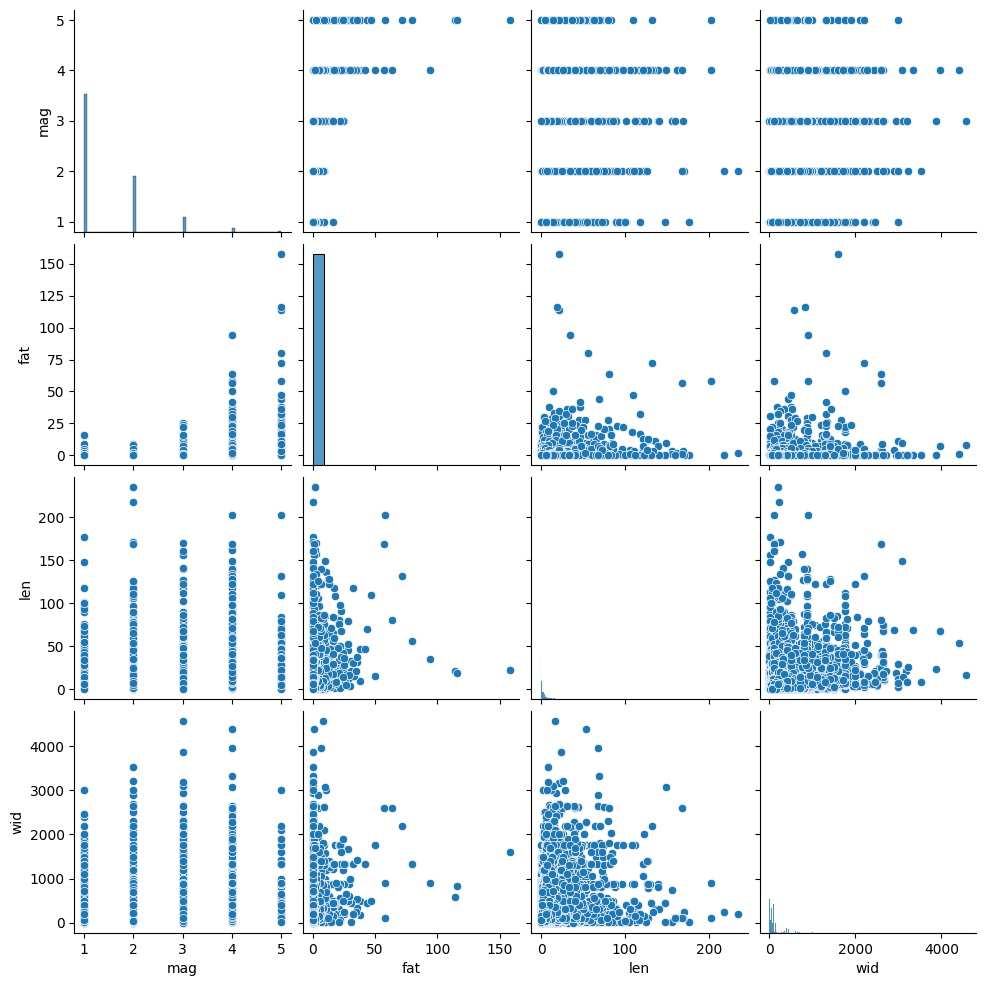

In [11]:
import seaborn as sns

tor = pd.read_csv("tor_data/1950-2024_actual_tornadoes.csv")

tor = tor[tor.mag >= 1]

cols = ['mag', 'fat', 'len', 'wid']

sns.pairplot(tor[cols], kind="scatter", diag_kind="hist")